# Practice Session 01+02: Data preparation

Author: <font color="blue">Miguel Rando Ramirez</font>

E-mail: <font color="blue">miguel.rando01@estudiant.upf.edu</font>

Date: <font color="blue">1/10/2024</font>

# 1. Exploratory data analysis 

In [216]:
import pandas as pd
import seaborn as sns
import datetime

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [217]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [218]:
print(input_dataset.columns) #printing columns headers

Index(['PURCHASED_DEVICE', 'DEVICE_VALUE', 'LAST_DEVICE_CHANGE',
       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
       'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
       'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2',
       'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4',
       'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'BILLING_MONTH_1',
       'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4',
       'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1',
       'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4',
       'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'LINE_ACTIVATION_DATE',
       'MONTHS_LAST_DEVICE', 'DURATION_LINE', 'PREVIOUS_DEVICE_MODEL',
       'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND'],
      dtype='object')


In [219]:
print(input_dataset.head()) #printing firts 5 rows

                                    PURCHASED_DEVICE  DEVICE_VALUE  \
0  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        393.00   
1  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        345.00   
2     TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO        875.00   
3  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        345.00   
4     TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO        609.00   

   LAST_DEVICE_CHANGE  DATA_TRAFFIC_MONTH_1  DATA_TRAFFIC_MONTH_2  \
0                 NaN                465.25                530.81   
1         20170401.00                232.24                272.26   
2                 NaN                484.62                264.14   
3         20171001.00               4255.46                836.12   
4         20190101.00               5014.10               2659.05   

   DATA_TRAFFIC_MONTH_3  DATA_TRAFFIC_MONTH_4  DATA_TRAFFIC_MONTH_5  \
0                530.81                781.13                398.99   
1                272.2

<font size="+1" color="red">Replace this cell with your code to create and display a dataframe containing one row per column, and with the following fields: name of the column, type, number of distinct elements, and size. The size of all columns should be equal.</font>

In [220]:
columns = []

for column in input_dataset.columns:
    columns.append({'column name': column,'type': input_dataset[column].dtype, 'elements': input_dataset[column].nunique(), 'size': input_dataset[column].size})



column_type_df = pd.DataFrame(columns, columns=['column name', 'type', 'elements', 'size'])

display(column_type_df)

,column name,type,elements,size
0,PURCHASED_DEVICE,object,101,10000
1,DEVICE_VALUE,float64,368,10000
2,LAST_DEVICE_CHANGE,float64,76,10000
3,DATA_TRAFFIC_MONTH_1,float64,7215,10000
4,DATA_TRAFFIC_MONTH_2,float64,7182,10000
5,DATA_TRAFFIC_MONTH_3,float64,7176,10000
6,DATA_TRAFFIC_MONTH_4,float64,7124,10000
7,DATA_TRAFFIC_MONTH_5,float64,7173,10000
8,DATA_TRAFFIC_MONTH_6,float64,7074,10000
9,VOICE_TRAFFIC_MONTH_1,float64,3550,10000


To obtain a series (column) from a dataframe you can reference an attribute by name, e.g., input_dataset.DEVICE_VALUE returns the series of all device values.

On a series, you can use functions from numpy such as np.mean, np.median, np.std, np.min and np.max; meanings are self-explanatory. These functions have equivalents np.nanmean, np.nanmedian, and so on that ignore NaN (not-a-number) values.

To display floats using two decimals, you can use:

pd.options.display.float_format = '{:.2f}'.format

<font size="+1" color="red">Replace this cell with code to create and display a dataframe containing one row per each column of type ``float64`` in the input data, and with the following fields: name of the column, mean, median, min, max -- all computed ignoring NaN values.</font>

In [221]:
columns = []

pd.options.display.float_format = '{:.2f}'.format

for column in input_dataset.columns:
    
    # Convertir los strings a tipo NaN
    numeric_column = pd.to_numeric(input_dataset[column], errors='coerce')
    
    
    mean = np.nanmean(numeric_column)
    median = np.nanmedian(numeric_column)
    mini = np.nanmin(numeric_column)
    maxi = np.nanmax(numeric_column)
    
    
    columns.append({'column name': column,'mean': mean, 'median': median, 'min': mini, 'max': maxi})



column_type_df = pd.DataFrame(columns, columns=['column name', 'mean', 'median', 'min', 'max'])

display(column_type_df)


<ipython-input-221-4558a0ca9cea>:11: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(numeric_column)
/Users/miguel/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
<ipython-input-221-4558a0ca9cea>:13: RuntimeWarning: All-NaN axis encountered
  mini = np.nanmin(numeric_column)
<ipython-input-221-4558a0ca9cea>:14: RuntimeWarning: All-NaN axis encountered
  maxi = np.nanmax(numeric_column)


,column name,mean,median,min,max
0,PURCHASED_DEVICE,NaN,NaN,NaN,NaN
1,DEVICE_VALUE,750.48,393.00,15.00,9057.00
2,LAST_DEVICE_CHANGE,20166984.77,20170601.00,20121001.00,20190501.00
3,DATA_TRAFFIC_MONTH_1,3481.83,1208.73,0.00,127017.59
4,DATA_TRAFFIC_MONTH_2,3649.96,1294.95,0.00,111948.84
5,DATA_TRAFFIC_MONTH_3,3653.43,1310.67,0.00,111948.84
6,DATA_TRAFFIC_MONTH_4,3269.44,1176.54,0.00,87856.41
7,DATA_TRAFFIC_MONTH_5,3673.37,1287.09,0.00,121834.81
8,DATA_TRAFFIC_MONTH_6,3427.69,1277.12,0.00,90550.61
9,VOICE_TRAFFIC_MONTH_1,154.85,84.05,0.00,4220.10


<font size="+1" color="red">Replace this cell with code to print each column name and then use the `describe` function to print statistics for that column. Include a blank line after each description.</font>

In [222]:
for column in input_dataset.columns:

    
    description = input_dataset[column].describe()
    
    # Imprimir el nombre de la columna
    print(column)
    
    # Imprimir la descripción
    print(description)
    
    # Imprimir una línea en blanco
    print("\n")  

PURCHASED_DEVICE
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object


DEVICE_VALUE
count   9690.00
mean     750.48
std      979.71
min       15.00
25%      297.00
50%      393.00
75%      609.00
max     9057.00
Name: DEVICE_VALUE, dtype: float64


LAST_DEVICE_CHANGE
count       7682.00
mean    20166984.77
std        10925.77
min     20121001.00
25%     20160801.00
50%     20170601.00
75%     20171001.00
max     20190501.00
Name: LAST_DEVICE_CHANGE, dtype: float64


DATA_TRAFFIC_MONTH_1
count     8868.00
mean      3481.83
std       6364.54
min          0.00
25%         51.92
50%       1208.73
75%       4249.16
max     127017.59
Name: DATA_TRAFFIC_MONTH_1, dtype: float64


DATA_TRAFFIC_MONTH_2
count     8841.00
mean      3649.96
std       6444.36
min          0.00


<font size="+1" color="red">Replace this cell with a brief commentary comparing the previous results for **DURATION_LINE** (time that the customer has had a line) with the ones from the `describe` function.</font>

<font size="+1" color="red">Indicate all the differences between the statistics that `describe` computed, and the statistics you computed (e.g., missing or extra computations).</font>

For duration_line the statistics we get are the same than from the function "describe". We can see that the mean is 62.37 for both, the median (50%) is 48, min value is 0 and max value is 320.

More os less is the same in all the columns, the describe function is a little bit more detailed. It has all the quartiles (25%, 50% median, 75%), also the standart deviation and the count of elements that are in the column (not counting nan)

## 1.2. Inventory of device models

<font size="+1" color="red">Replace this cell with code to display a census of PREVIOUS_DEVICE_MODEL and PREVIOUS_DEVICE_BRAND. You should create and display a dataframe in each case.</font>

In [223]:
model = {}

for element in input_dataset.PREVIOUS_DEVICE_MODEL:
    if element not in model:
        model[element] = 1
        
    else:
        model[element] += 1
        
        
# hacemos una list de diccionaros para el display
model_list = [{'model': key, 'count': value} for key, value in model.items()]

        
brand = {}

for element in input_dataset.PREVIOUS_DEVICE_BRAND:
    if element not in brand:
        brand[element] = 1
        
    else:
        brand[element] += 1
        
brand_list = [{'brand': key, 'count': value} for key, value in brand.items()]

# con dropna quitamos los nan
model_df = pd.DataFrame(model_list).dropna().sort_values(by='count', ascending=False)
brand_df = pd.DataFrame(brand_list).dropna().sort_values(by='count', ascending=False)

# display the frames
print("Census of PREVIOUS_DEVICE_MODEL:")
print(model_df)


print("Census of PREVIOUS_DEVICE_BRAND:")
print(brand_df)
        
    

Census of PREVIOUS_DEVICE_MODEL:
                       model  count
18                  iPhone 7    425
3                   iPhone 6    250
7          Samsung Galaxy J5    243
10                 iPhone 6S    212
1     Samsung Galaxy J1 Mini    204
..                       ...    ...
377         LG Optimus L3 II      1
379  Lenovo S930,Lenovo S939      1
380         Samsung Corby II      1
381                 SGH-U600      1
291               Nokia 1100      1

[580 rows x 2 columns]
Census of PREVIOUS_DEVICE_BRAND:
      brand  count
1   Samsung   1877
3    Outros   1592
2     Apple   1548
0  Motorola    638
5        LG    514


<font size="+1" color="red">The most common device model and the most common device brand do not match, why do you think it is so? Replace this cell with an explanation.</font>

The most common model is iPhone 7 and the most common brand is Samsusung. This is because the last iPhone is always the most popular device in the market, so Apple strategy is to have the last technology, and thats why they have less devices than samsung. Normaly apple consumers only buy between last three models. In the other hand, samsung tries to have more devices in the market to cover different neccesaries in a cheaper price. They try to reach more people, not to have the best device on the market. Thats why samsung sells more devices but the last iphone (in this case iphone 7) is the best seller.

# 2. Feature engineering

## 2.1. Missing values management

<font size="+1" color="red">Replace this cell with your code to print all columns that contain at least one NaN value, and what is the percentage of NaN values in that column. (Create a dataframe with this information, and then display it.)</font>

In [224]:
columns_info = []


for column in input_dataset.columns:
    nan_count = input_dataset[column].isna().sum()
    total_count = input_dataset[column].size
    if nan_count > 0:  # solo se hace el porcentaje de las columnas que tienen un nan
        percentage_nan = (nan_count / total_count) * 100
        columns_info.append({
            'column name': column,
            'nan count': nan_count,
            'percentage of NaN (%)': percentage_nan
        })
        
nan_info_df = pd.DataFrame(columns_info, columns=['column name', 'nan count', 'percentage of NaN (%)'])

display(nan_info_df)



,column name,nan count,percentage of NaN (%)
0,PURCHASED_DEVICE,147,1.47
1,DEVICE_VALUE,310,3.10
2,LAST_DEVICE_CHANGE,2318,23.18
3,DATA_TRAFFIC_MONTH_1,1132,11.32
4,DATA_TRAFFIC_MONTH_2,1159,11.59
5,DATA_TRAFFIC_MONTH_3,1154,11.54
6,DATA_TRAFFIC_MONTH_4,1183,11.83
7,DATA_TRAFFIC_MONTH_5,1134,11.34
8,DATA_TRAFFIC_MONTH_6,1465,14.65
9,VOICE_TRAFFIC_MONTH_1,1132,11.32


<font size="+1" color="red">If there is no **PURCHASED\_DEVICE**, **DEVICE\_VALUE**, or **PREVIOUS\_DEVICE\_MODEL**, the row is useless to us. Replace this cell with code to remove those rows.</font>

In [225]:
columns = ['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL']


new_dataset = input_dataset.dropna(subset=columns)



<font size="+1" color="red">Any NaN value in **DATA\_TRAFFIC\_MONTH\_(1..6)**, **VOICE\_TRAFFIC\_MONTH_(1..6)**, **BILLING\_MONTH_(1..6)**, or **DEVICE\_COST\_MONTH\_(1..6)** should be assumed to be 0. Replace this cell with code to do that imputation.</font>

In [226]:
columns = [
    'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5','DATA_TRAFFIC_MONTH_6',
    'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
    'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
    'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6'
]

new_dataset[columns] = new_dataset[columns].fillna(0)

display(new_dataset)

/Users/miguel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,0.00,20150622.00,NaN,42.00,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,0.00,20170419.00,20.00,20.00,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,9.00,20130326.00,8.00,69.00,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,0.00,20110214.00,NaN,94.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


<font size="+1" color="red">If there is no **LINE\_ACTIVATION\_DATE**, we will assume it is equal to **LAST\_DEVICE\_CHANGE**. Replace this cell with code to do that imputation.</font>

In [227]:
new_dataset['LINE_ACTIVATION_DATE'].fillna(new_dataset['LAST_DEVICE_CHANGE'], inplace=True)



/Users/miguel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<font size="+1" color="red">Replace this cell with code to print the header and the first five rows after this processing</font>

In [228]:
print(new_dataset.head())


                                    PURCHASED_DEVICE  DEVICE_VALUE  \
0  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        393.00   
1  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        345.00   
2     TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO        875.00   
3  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        345.00   
4     TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO        609.00   

   LAST_DEVICE_CHANGE  DATA_TRAFFIC_MONTH_1  DATA_TRAFFIC_MONTH_2  \
0                 NaN                465.25                530.81   
1         20170401.00                232.24                272.26   
2                 NaN                484.62                264.14   
3         20171001.00               4255.46                836.12   
4         20190101.00               5014.10               2659.05   

   DATA_TRAFFIC_MONTH_3  DATA_TRAFFIC_MONTH_4  DATA_TRAFFIC_MONTH_5  \
0                530.81                781.13                398.99   
1                272.2

<font size="+1" color="red">Replace this cell with code to print the number of rows of the original dataset, the number of rows of the new dataset, and the percentage of rows that were dropped, as well as the names of the columns that still contain NaN values, if any.</font>

In [229]:
original_shape = input_dataset.shape
original_rows = original_shape[0]


new_shape = new_dataset.shape
new_rows = new_shape[0]

percentage = (100 * (original_rows - new_rows)/ original_rows)

print(f'Rows in the original dataset: ', original_rows)
print(f'Rows in the  new dataset: ', new_rows, f'(', percentage, f'% less)')


#encontrar las columnas con NaN
columns_with_nan = new_dataset.columns[new_dataset.isna().sum() > 0]

if len(columns_with_nan) > 0:
    print(f'Columns that still contain NaN values: {list(columns_with_nan)}')
else:
    print('No columns contain NaN values.')



Rows in the original dataset:  10000
Rows in the  new dataset:  5988 ( 40.12 % less)
Columns that still contain NaN values: ['LAST_DEVICE_CHANGE', 'LINE_ACTIVATION_DATE', 'MONTHS_LAST_DEVICE', 'DURATION_LINE']


## 2.2. Distributions, outliers, and correlations

<font size="+1" color="red">Replace this cell with code to plot a histogram of **DEVICE\_VALUE** and **DURATION\_LINE**. Remember to include a title, and labels on the x axis and y axis</font>

<font size="+1" color="red">Include after each histogram a markdown cell where you indicate if you recognize any specific distribution (normal, exponential, uniform, ...) or any characteristic of the distribution (unimodal, bimodal).</font>

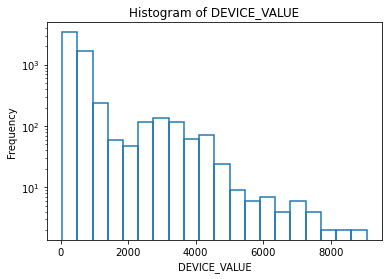

In [230]:
# Histograma para DEVICE_VALUE
ax = sns.histplot(new_dataset['DEVICE_VALUE'], kde=False, bins=20, fill=False)
ax.set(title='Histogram of DEVICE_VALUE', xlabel='DEVICE_VALUE', ylabel='Frequency')
plt.yscale('log')


We can see a logarithmic bimodal distribution, as it has a tail to the right and the frequency values descend very quickly and it has tow peaks.

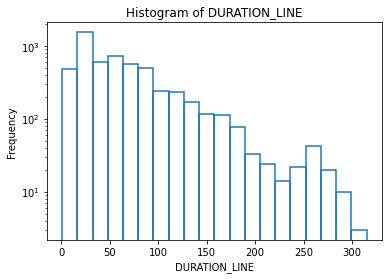

In [231]:
# Histograma para DURATION_LINE
ax = sns.histplot(new_dataset['DURATION_LINE'], kde=False, bins=20, fill=False)
ax.set(title='Histogram of DURATION_LINE', xlabel='DURATION_LINE', ylabel='Frequency')
plt.yscale('log')


As well as in the other one, it is a logarithmic bimodal distribution, but in this case the second peak is later.

<font size="+1" color="red">Replace this cell with a series of cells with code to plot a histogram comparing **VOICE\_TRAFFIC\_MONTH\_1** against **VOICE\_TRAFFIC\_MONTH\_6**, and **BILLING\_MONTH\_1** against **BILLING\_MONTH\_6**. Remember to include a title, labels on the x axis and y axis, and a legend.</font>

<font size="+1" color="red">Both plots should use logarithmic scale on the y axis</font>

<font size="+1" color="red">Include after both histograms your comment on the differences between month 1 and month 6.</font>

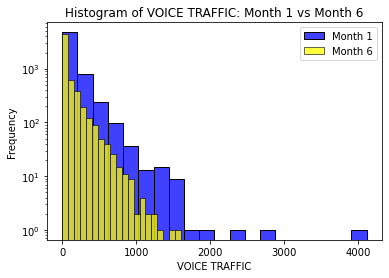

In [232]:
sns.histplot(new_dataset['VOICE_TRAFFIC_MONTH_1'], bins=20, fill=True, color='blue', label='Month 1', kde=False)
sns.histplot(new_dataset['VOICE_TRAFFIC_MONTH_6'], bins=20, fill=True, color='yellow', label='Month 6', kde=False)
plt.title('Histogram of VOICE TRAFFIC: Month 1 vs Month 6')
plt.xlabel('VOICE TRAFFIC')
plt.ylabel('Frequency')
plt.legend()
plt.yscale('log')

We can see that the voice traffic is huge in the first month

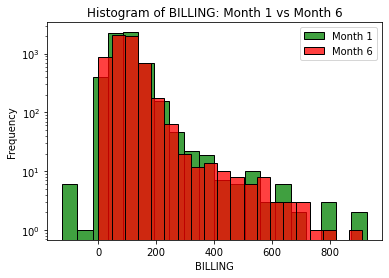

In [233]:
sns.histplot(new_dataset['BILLING_MONTH_1'], bins=20, fill=True, color='green', label='Month 1', kde=False)
sns.histplot(new_dataset['BILLING_MONTH_6'], bins=20, fill=True, color='red', label='Month 6', kde=False)
plt.title('Histogram of BILLING: Month 1 vs Month 6')
plt.xlabel('BILLING')
plt.ylabel('Frequency')
plt.legend()
plt.yscale('log')

In this case they are more similar, but the bigger difference is that only month 1 has negative values for billings.

<font size="+1" color="red">Replace this cell with code to apply **log(x+1)** to **VOICE\_TRAFFIC\_MONTH\_1** and plot its new distribution.</font>

<ipython-input-234-a96f0b648f10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['LOG_VOICE_TRAFFIC_MONTH_1'] = np.log(new_dataset['VOICE_TRAFFIC_MONTH_1'] + 1)


[Text(0.5, 1.0, 'Histogram of VOICE_TRAFFIC_MONTH_1'),
 Text(0.5, 0, 'LOG(VOICE TRAFFIC MONTH 1)'),
 Text(0, 0.5, 'Frequency')]

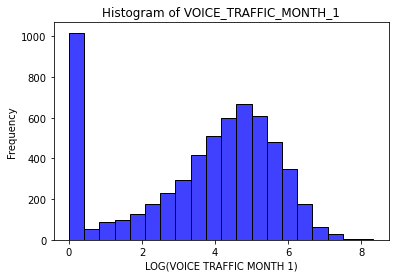

In [234]:
new_dataset['LOG_VOICE_TRAFFIC_MONTH_1'] = np.log(new_dataset['VOICE_TRAFFIC_MONTH_1'] + 1)


ax = sns.histplot(new_dataset['LOG_VOICE_TRAFFIC_MONTH_1'], bins=20, fill=True, color='blue', kde=False)
ax.set(title='Histogram of VOICE_TRAFFIC_MONTH_1', xlabel='LOG(VOICE TRAFFIC MONTH 1)', ylabel='Frequency')


<font size="+1" color="red">Replace this cell with code to create thre boxplots, each of them for one of the  variables **DATA\_TRAFFIC\_MONTH\_6**, **VOICE\_TRAFFIC\_MONTH\_6** and **BILLING\_MONTH\_6**. Remember to include a title and a label for the y axis.</font>

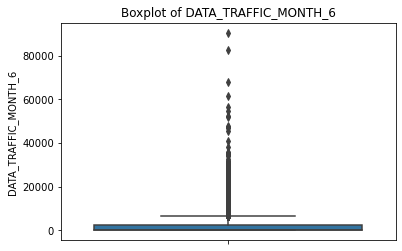

In [235]:
# Boxplot for DATA_TRAFFIC_MONTH_6
sns.boxplot(y=new_dataset['DATA_TRAFFIC_MONTH_6'])
plt.title('Boxplot of DATA_TRAFFIC_MONTH_6')
plt.ylabel('DATA_TRAFFIC_MONTH_6')

plt.show()


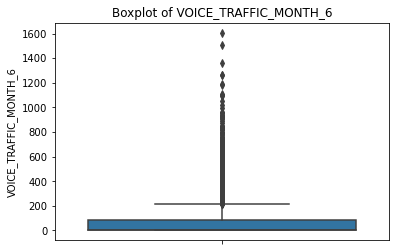

In [236]:
# Boxplot for VOICE_TRAFFIC_MONTH_6
sns.boxplot(y=new_dataset['VOICE_TRAFFIC_MONTH_6'])
plt.title('Boxplot of VOICE_TRAFFIC_MONTH_6')
plt.ylabel('VOICE_TRAFFIC_MONTH_6')

plt.show()

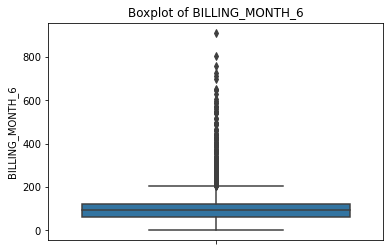

In [237]:
# Boxplot for BILLING_MONTH_6
sns.boxplot(y=new_dataset['BILLING_MONTH_6'])
plt.title('Boxplot of BILLING_MONTH_6')
plt.ylabel('BILLING_MONTH_6')

plt.show()


<font size="+1" color="red">Replace this cell with a brief commentary indicating which extreme values would you use as threshold for **outliers** in these variables, by looking at these box plots</font>

For DATA_TRAFFIC_MONTH_6 I think that the threshold is at 80000, so we would have 2 outliers.
For VOICE_TRAFFIC_MONTH_6 I think it is 1400, so will also be 2 outliers.
Then for BILLING_MONTH_6 I would say it is 800, there for we would have 1 outlier.

<font size="+1" color="red">Replace this cell with code to calculate the correlation between all traffic attributes (i.e., voice and data), duration line, billing, device cost and device value. Display the result as a table with rows and columns corresponding to columns, and cells indicating correlations. Display the result as an image using ``matshow``</font>

Correlation matrix:


,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,VOICE_TRAFFIC_MONTH_4,...,BILLING_MONTH_5,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,DEVICE_VALUE,DURATION_LINE
DATA_TRAFFIC_MONTH_1,1.00,0.76,0.73,0.70,0.66,0.62,0.09,0.07,0.07,0.07,...,0.19,0.19,0.01,0.05,0.08,0.08,0.08,0.08,0.12,-0.01
DATA_TRAFFIC_MONTH_2,0.76,1.00,0.97,0.79,0.76,0.69,0.08,0.08,0.08,0.07,...,0.19,0.20,0.01,0.05,0.06,0.07,0.07,0.07,0.11,0.01
DATA_TRAFFIC_MONTH_3,0.73,0.97,1.00,0.81,0.77,0.70,0.08,0.08,0.08,0.07,...,0.19,0.20,0.01,0.05,0.06,0.07,0.07,0.07,0.12,0.01
DATA_TRAFFIC_MONTH_4,0.70,0.79,0.81,1.00,0.83,0.72,0.09,0.09,0.09,0.09,...,0.21,0.22,0.01,0.05,0.07,0.07,0.07,0.07,0.12,-0.02
DATA_TRAFFIC_MONTH_5,0.66,0.76,0.77,0.83,1.00,0.80,0.09,0.09,0.10,0.09,...,0.21,0.22,0.01,0.03,0.07,0.06,0.06,0.06,0.13,0.00
DATA_TRAFFIC_MONTH_6,0.62,0.69,0.70,0.72,0.80,1.00,0.08,0.08,0.08,0.08,...,0.19,0.20,0.01,0.05,0.09,0.07,0.07,0.08,0.12,0.00
VOICE_TRAFFIC_MONTH_1,0.09,0.08,0.08,0.09,0.09,0.08,1.00,0.82,0.80,0.74,...,0.13,0.14,-0.01,0.00,0.01,0.00,0.01,0.01,0.02,0.02
VOICE_TRAFFIC_MONTH_2,0.07,0.08,0.08,0.09,0.09,0.08,0.82,1.00,0.98,0.83,...,0.11,0.12,-0.01,0.00,-0.00,0.00,0.00,0.00,0.03,0.03
VOICE_TRAFFIC_MONTH_3,0.07,0.08,0.08,0.09,0.10,0.08,0.80,0.98,1.00,0.85,...,0.11,0.12,-0.01,0.01,-0.00,0.00,0.00,0.01,0.03,0.03
VOICE_TRAFFIC_MONTH_4,0.07,0.07,0.07,0.09,0.09,0.08,0.74,0.83,0.85,1.00,...,0.12,0.12,-0.01,0.01,0.01,-0.00,-0.00,0.01,0.02,0.02


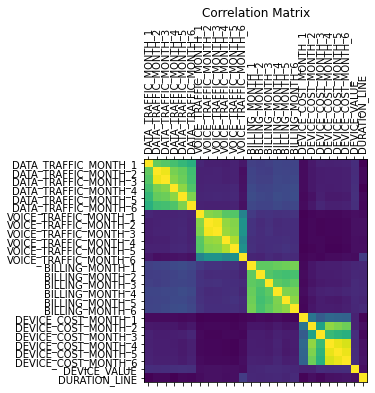

In [238]:
columns = [
    'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
    'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
    'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
    'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6',
    'DEVICE_VALUE', 'DURATION_LINE'
]





# Calculate correlation matrix. No he puesto (numeric_only=True) porque me daba error.
correlation_matrix = new_dataset[columns].corr(method='pearson')

# display table
print("Correlation matrix:")
display(correlation_matrix)

# display the correlation matrix as an image using matshow
plt.matshow(correlation_matrix, fignum=1)

# set x and y ticks with the column names 
plt.xticks(ticks=range(len(columns)), labels=columns, rotation=90)
plt.yticks(ticks=range(len(columns)), labels=columns)

plt.title('Correlation Matrix')
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the results. Is the billing more correlated, in general, with the data traffic or with the voice traffic?</font>

It is more related with data traffic. We can see for month 6 that the correlation value between billing and data is 0.19 and between billing and voice is 0.08. So the higher value, more related.

This suggests that customers who consume more data tend to have higher bills compared to those who use voice services. 

## 2.3. Date management and period calculation

<font size="+1" color="red">Replace this cell with code to create and print `latest_change` and `now`.</font>

In [239]:


# latest date
latest_change = int(new_dataset['LAST_DEVICE_CHANGE'].max())  
latest_change_str = str(latest_change)  # convert to string

# datetime 
latest_change = datetime.datetime.strptime(latest_change_str, '%Y%m%d')


print(latest_change)

# Add 30 days 
now = latest_change + datetime.timedelta(days=30)

print(now)

2019-05-01 00:00:00
2019-05-31 00:00:00


<font size="+1" color="red">Replace this cell with code that replaces the **MONTHS_LAST_DEVICE** column to be equal to the difference, in periods of 30 days, between **LAST_DEVICE_CHANGE** and the `now` variable.</font>

In [240]:
series_converted = pd.to_datetime(new_dataset['LAST_DEVICE_CHANGE'], format='%Y%m%d')

difference = now - series_converted

months_difference = difference / (30 * datetime.timedelta(days=1))

new_dataset['MONTHS_LAST_DEVICE'] = months_difference.fillna(0).astype(int)



<ipython-input-240-8c063a3633ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['MONTHS_LAST_DEVICE'] = months_difference.fillna(0).astype(int)


<font size="+1" color="red">Replace this cell with code to update the **DURATION_LINE** value to be the difference, in days, between **LINE_ACTIVATION_DATE** and the `now` variable. Indicate the average of **DURATION_LINE** -- what is that in years, approximately?</font>

In [241]:
new_dataset['LINE_ACTIVATION_DATE'] = pd.to_datetime(new_dataset['LINE_ACTIVATION_DATE'], format='%Y%m%d')

new_dataset['DURATION_LINE'] = (now - new_dataset['LINE_ACTIVATION_DATE']).dt.days

average_duration_days = new_dataset['DURATION_LINE'].mean()
average_duration_years = average_duration_days / 365  

print(f'Average DURATION_LINE in days: {average_duration_days}')
print(f'Average DURATION_LINE in years: {average_duration_years:.2f}')

Average DURATION_LINE in days: 1950.7665416098228
Average DURATION_LINE in years: 5.34


<ipython-input-241-2734a40c58aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['LINE_ACTIVATION_DATE'] = pd.to_datetime(new_dataset['LINE_ACTIVATION_DATE'], format='%Y%m%d')
<ipython-input-241-2734a40c58aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['DURATION_LINE'] = (now - new_dataset['LINE_ACTIVATION_DATE']).dt.days



## 2.4. Standarization and scaling of numerical variables

<font size="+1" color="red">Replace this cell with code to standardize and min-max scale the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name followed by **_STANDARD** and **_MINMAX** (e.g., DATA\_TRAFFIC\_MONTH\_1\_STAND, DATA\_TRAFFIC\_MONTH\_1\_MINMAX). Plot a histogram for each new variable.</font>



<ipython-input-242-4c27124f3b6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['DATA_TRAFFIC_MONTH_1_STANDARD'] = StandardScaler().fit_transform(new_dataset[['DATA_TRAFFIC_MONTH_1']])
<ipython-input-242-4c27124f3b6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['VOICE_TRAFFIC_MONTH_1_STANDARD'] = StandardScaler().fit_transform(new_dataset[['VOICE_TRAFFIC_MONTH_1']])
<ipython-input-242-4c27124f3b6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

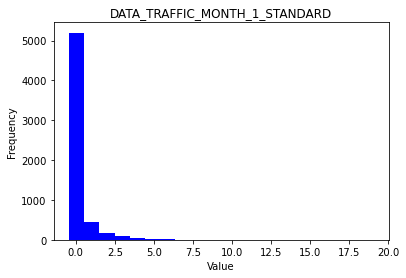

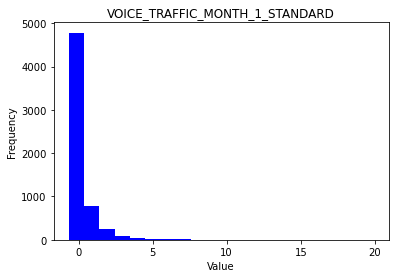

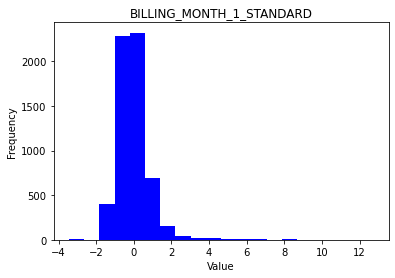

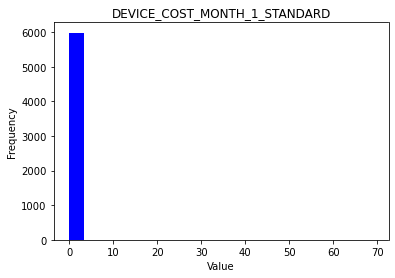

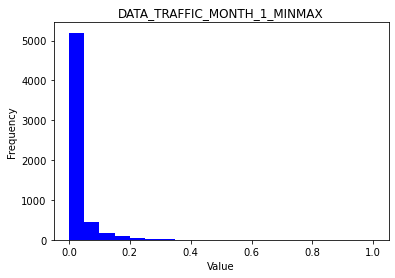

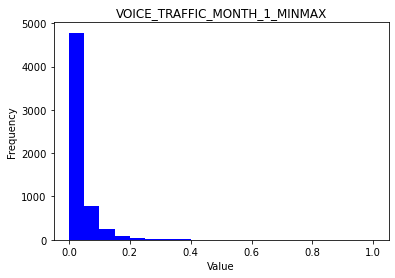

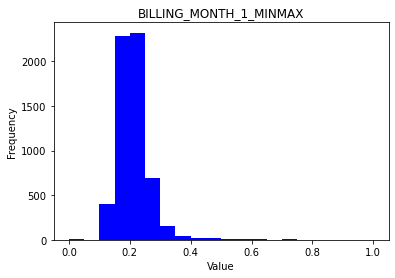

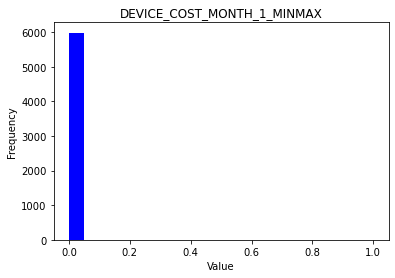

In [242]:


# estandarización
new_dataset['DATA_TRAFFIC_MONTH_1_STANDARD'] = StandardScaler().fit_transform(new_dataset[['DATA_TRAFFIC_MONTH_1']])
new_dataset['VOICE_TRAFFIC_MONTH_1_STANDARD'] = StandardScaler().fit_transform(new_dataset[['VOICE_TRAFFIC_MONTH_1']])
new_dataset['BILLING_MONTH_1_STANDARD'] = StandardScaler().fit_transform(new_dataset[['BILLING_MONTH_1']])
new_dataset['DEVICE_COST_MONTH_1_STANDARD'] = StandardScaler().fit_transform(new_dataset[['DEVICE_COST_MONTH_1']])

# min-max 
new_dataset['DATA_TRAFFIC_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(new_dataset[['DATA_TRAFFIC_MONTH_1']])
new_dataset['VOICE_TRAFFIC_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(new_dataset[['VOICE_TRAFFIC_MONTH_1']])
new_dataset['BILLING_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(new_dataset[['BILLING_MONTH_1']])
new_dataset['DEVICE_COST_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(new_dataset[['DEVICE_COST_MONTH_1']])


columns_to_plot = [
    'DATA_TRAFFIC_MONTH_1_STANDARD',
    'VOICE_TRAFFIC_MONTH_1_STANDARD',
    'BILLING_MONTH_1_STANDARD',
    'DEVICE_COST_MONTH_1_STANDARD',
    'DATA_TRAFFIC_MONTH_1_MINMAX',
    'VOICE_TRAFFIC_MONTH_1_MINMAX',
    'BILLING_MONTH_1_MINMAX',
    'DEVICE_COST_MONTH_1_MINMAX'
]

# crear histogramas 
for column in columns_to_plot:
    plt.hist(new_dataset[column], bins=20, color='blue')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## 2.5. Convert categorical columns to dummy binary variables

<font size="+1" color="red">Create variable **PREVIOUS_DEVICE_BRAND_INT_ENCODED** containing an integer encoding of variable **PREVIOUS_DEVICE_BRAND**.</font>

In [243]:
new_dataset['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = LabelEncoder().fit_transform(new_dataset['PREVIOUS_DEVICE_BRAND'])



<ipython-input-243-3920abbb86c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = LabelEncoder().fit_transform(new_dataset['PREVIOUS_DEVICE_BRAND'])


<font size="+1" color="red">Replace this cell with code to convert **PREVIOUS_DEVICE_MANUF** to dummy binary variables.</font>

In [245]:


device_dummies = pd.get_dummies(new_dataset['PREVIOUS_DEVICE_MANUF'], prefix='DEVICE')

display(device_dummies)

,DEVICE_ASUSTek Computer Inc,DEVICE_Apple Inc,DEVICE_BLU Products Inc,DEVICE_Beijing Flyscale Technologies Company Limited,DEVICE_BlackBerry Limited,DEVICE_Bullitt Group Limited,DEVICE_CT Asia (HK) Ltd,DEVICE_D-Link Corporation,DEVICE_DG HomTom Group Co Limited,DEVICE_DL Comercio e Industria de Produtos Eletronic,...,DEVICE_Telit Communications SpA,DEVICE_Topmax Glory Limited,DEVICE_Umi Network Technology Co Limited,DEVICE_United Mobile,DEVICE_United Time Hong Kong Ltd,DEVICE_Vikin Communication Technology Co Limited,DEVICE_Vogtec (H.K) Co Ltd,DEVICE_Xiaomi Communications Co Ltd,DEVICE_ZTE Corporation,DEVICE_u-blox AG
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.6. Feature generation

<font size="+1" color="red">Replace this cell with code to create from the 6 months of **DATA_TRAFFIC\_MONTH\_[1-6]**, **VOICE_TRAFFIC\_MONTH\_[1-6]**, **BILLING\_MONTH\_[1-6]** and **DEVICE_COST\_MONTH\_[1-6]**, new columns with the mean, maximum, minimum, range (i.e., difference between maximum and minimum) for each element. For instance, column **DATA_TRAFFIC_MEAN** should contain the average of these six numbers: **DATA_TRAFFIC_MONTH_1**, **DATA_TRAFFIC_MONTH_2**, ..., **DATA_TRAFFIC_MONTH_6**.</font>

<font size="+1" color="red">Replace this cell with code create an additional column **DEVICE_COST_TO_BILLING_RATIO** containing the ratio between **DEVICE_COST_MEAN** and **BILLING_MEAN** and plot its distribution.</font>

<font size="+1" color="red">Replace this cell with a brief commentary on the distribution of the variable **DEVICE_COST_TO_BILLING_RATIO**. Can you recognize its distribution?</font>

## 2.7. Text parsing/processing

<font size="+1" color="red">Replace this cell with code to use the **PURCHASED_DEVICE** variable to create 3 new columns with the following variables names: **PURCHASED_DEVICE_CODE**, **PURCHASED_DEVICE_MANUFACTURER** and **PURCHASED_DEVICE_MODEL**.</font>

<font size="+1" color="red">Replace this cell with code to create two tables: one with the number of devices per manufacturer in **PURCHASED_DEVICE_MANUFACTURER** and one with the number of devices per manufacturer in  **PREVIOUS_DEVICE_MANUF**.

## 2.8. Splitting and sampling a dataset

<font size="+1" color="red">Replace this cell with code to split the dataset in two separate datasets: one with 70% of the rows and the other with 30% of rows</font>

<font size="+1" color="red">Replace this cell with code to compute the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) for the variables **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1** and **BILLING_MONTH_1** in both training and testing parts of the dataset.</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating if you find these statistics match between the two splits, or do not match between them.</font>

# 3. Comparing iPhone and Samsung J series users

<font size="+1" color="red">Replace this cell with code to create two dataframes: one with all the attributes of Apple iPhone users and one with all the attributes of Samsung J series users.</font>

<font size="+1" color="red">Replace this cell with code to compare some variables between the two datasets. Consider 2 or 3 variables, plot together the histograms of each variable in both datasets (including a legend).</font>

<font size="+1" color="red">Replace this cell with a brief commentary on the differences you found between these two groups of users.</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>